Finding Heavy Traffic Indicators on I-94

Using exploratary Data Analysis to determine a few indicators of heavy traffic on I-94. 

In [2]:
import pandas as pd 

metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

In [6]:
day = metro[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]
print(day.shape)

night = metro[(metro['date_time'].dt.hour >= 19) | (metro['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


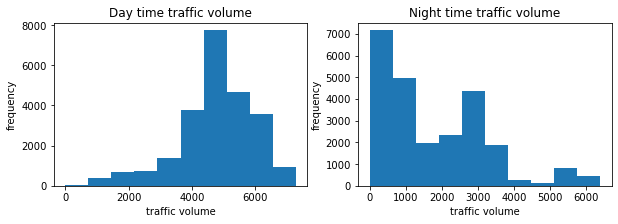

In [7]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Day time traffic volume")
plt.xlabel("traffic volume")
plt.ylabel("frequency")
plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Night time traffic volume")
plt.xlabel("traffic volume")
plt.ylabel("frequency")
plt.show()

In [8]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

/var/folders/8w/dm17jvs10x7g3k95h9hwdgnm0000gp/T/ipykernel_72934/3933117845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["month"] = day["date_time"].dt.month


<AxesSubplot:xlabel='month'>

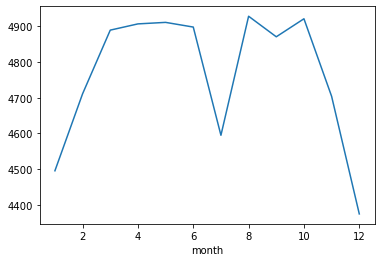

In [10]:
day["month"] = day["date_time"].dt.month
by_month = day.groupby("month").mean()
by_month["traffic_volume"].plot.line()

In [11]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

/var/folders/8w/dm17jvs10x7g3k95h9hwdgnm0000gp/T/ipykernel_72934/1778748283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dayofweek'] = day['date_time'].dt.dayofweek


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<AxesSubplot:xlabel='dayofweek'>

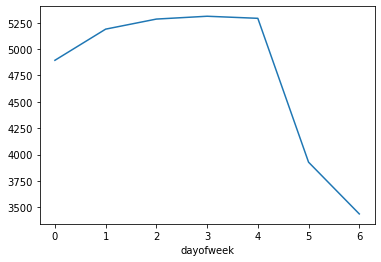

In [12]:
by_dayofweek['traffic_volume'].plot.line()

In [13]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


/var/folders/8w/dm17jvs10x7g3k95h9hwdgnm0000gp/T/ipykernel_72934/2522366303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour


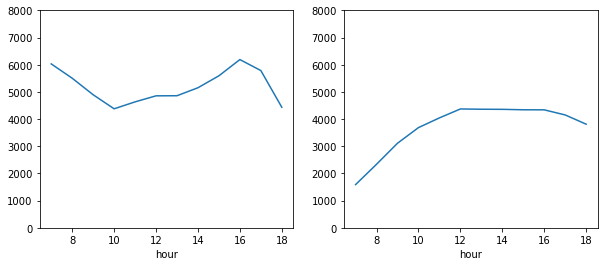

In [14]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
by_hour_business["traffic_volume"].plot.line()
plt.ylim([0,8000])
plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.ylim([0,8000])
plt.show()

In [15]:
metro.corr()[["temp",'rain_1h','snow_1h','clouds_all',"traffic_volume"]]

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


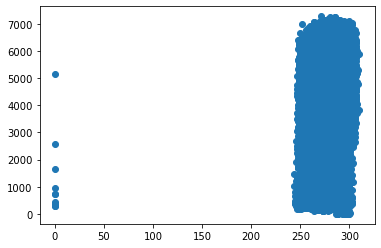

In [16]:
plt.scatter(x = metro["temp"], y=metro["traffic_volume"])

In [17]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

<AxesSubplot:ylabel='weather_main'>

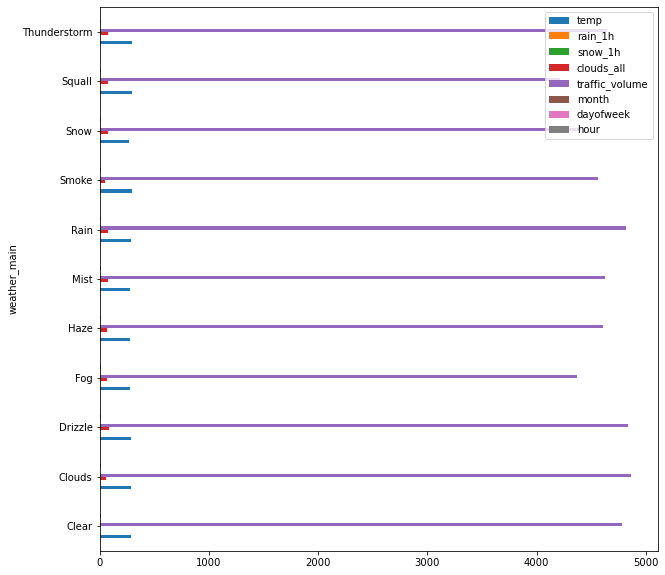

In [22]:
by_weather_main.plot.barh(figsize=(10,10))